In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
# matplotlib.style.available

In [4]:
str = "237K temp-1280x720-10.mp4  221K temp-1280x720-15.mp4  245K temp-1280x720-5.mp4   57K temp-480x360-10.mp4   53K temp-480x360-15.mp4   57K temp-480x360-5.mp4   85K temp-640x480-10.mp4   81K temp-640x480-15.mp4   93K temp-640x480-5.mp4"
str = str.replace('K', ' ')
for i in str.split(' '):
    if i.isnumeric():
        print(int(i) - 85)
    else:
        print(i)
    

152

temp-1280x720-10.mp4

136

temp-1280x720-15.mp4

160

temp-1280x720-5.mp4


-28

temp-480x360-10.mp4


-32

temp-480x360-15.mp4


-28

temp-480x360-5.mp4


0

temp-640x480-10.mp4


-4

temp-640x480-15.mp4


8

temp-640x480-5.mp4


In [41]:
import yaml
import torch

# stats = yaml.load(open('stats_cityscape_0', 'r'))
stats = yaml.load(open('stats_la_driving', 'r'))

stats = [i for i in stats if 'fr_20' not in i['video_name']]

total_sec = 59

/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [42]:
keys = ['qp', 'fr', 'res']

def parse_config(video_name, from_video_name = True):
    if from_video_name:
        config = video_name.split('/')[-1].split('.')[0]
    else:
        config = video_name

    ret = {'config': config}

    split = list(config.split('_'))

    for i in range(len(split)):
        if split[i] in keys:
            ret[split[i]] = int(split[i+1])

    return ret


for i in stats:
    i.update(parse_config(i['video_name']))
    i['std_score_mean'] = i['std_score'] / i['fr']
    i['abs_score_mean'] = i['abs_score'] / i['fr']
    i['range_score_mean'] = i['range_score'] / i['fr']

for sec in range(total_sec):

    if len([i['bw'] for i in stats if '/%d/' % sec in i['video_name']]) == 0:
        continue

    bw = max([i['bw'] for i in stats if '/%d/' % sec in i['video_name']])
    print(bw)

    for i in stats:
        if '/%d/' % sec in i['video_name']:
            i['norm_bw'] = i['bw'] / bw


1566664
1371793
1102911
1573614
557994
721616
823467
1229064
1734398
1011286
1036622
1504799
1694973
1710684
1373910
1011448
1056017
1349840
1550400
1549009
1894742
1385676
1392225
1842968
1731270
1451977
1311646
1682467
1316191
1064840
1235562
1295545
1480116
1259720
2196825
1805071
987538
1127827
1408683
813670
1574337
1359133
1151164
1866042
1770488
1032512
980477
1507774
849489
983154
1085521
1854957
1834058
1417242
891124
1190032
1146333
1058730
793417


In [18]:
open('stats_cityscape_0', 'w').write(yaml.dump(stats))

843097

cityscape/stuttgart_0/0/video_qp_36_fr_30_res_720.mp4


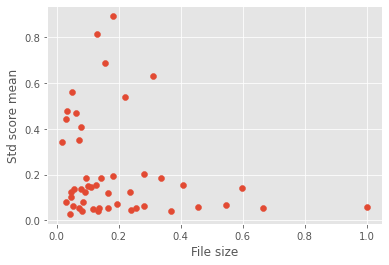

In [6]:


def plot(data, label=None):
    plt.scatter([i['norm_bw'] for i in data], [i['std_score_mean']  for i in data], label=label)
    plt.xlabel('File size')
    plt.ylabel('Std score mean')

# stats1 = [i for i in stats if '/0/video' in i['video_name']]
# stats1 = [i for i in stats1 if 'fr_30' in i['video_name']]
# print(stats1[0]['video_name'])
# plot(stats1, 'fr 30')

# stats1 = [i for i in stats if '/0/video' in i['video_name']]
# stats1 = [i for i in stats1 if 'fr_10' in i['video_name']]
# print(stats1[0]['video_name'])
# plot(stats1, 'fr 10')

# stats1 = [i for i in stats if '/0/video' in i['video_name']]
# stats1 = [i for i in stats1 if 'fr_3_' in i['video_name']]
# plot(stats1, 'fr 3')


stats0 = [i for i in stats if '/0/video' in i['video_name']]

obj = [i['sum_score'] - 2.5/5*40*i['norm_bw'] - 15 * i['std_score_mean'] for i in stats0]

for i in range(len(obj)):
    if obj[i] == max(obj):
        print(stats0[i]['video_name'])

plot(stats0, 'overall')


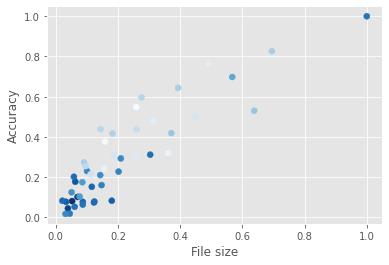

In [76]:

stats1 = [i for i in stats if '/8/video' in i['video_name']]
# stats1 = [i for i in stats if '/10/video' in i['video_name']]
# stats1 = [i for i in stats1 if 'fr_30_res_720' in i['video_name']]

def plot(data):
    plt.scatter([i['norm_bw'] for i in data], [i['f1'] for i in data], c=[i['sum_score'] - 2.5/5*40*i['norm_bw'] - 15 * i['std_score_mean'] for i in data], cmap='Blues_r')
    plt.xlabel('File size')
    plt.ylabel('Accuracy')
plot(stats1)



# plot the objective function on the 0th second

['cityscape/stuttgart_0/0/video_qp_24_fr_3_res_720.mp4', 'cityscape/stuttgart_0/0/video_qp_27_fr_3_res_720.mp4', 'cityscape/stuttgart_0/0/video_qp_30_fr_3_res_720.mp4', 'cityscape/stuttgart_0/0/video_qp_36_fr_3_res_720.mp4']


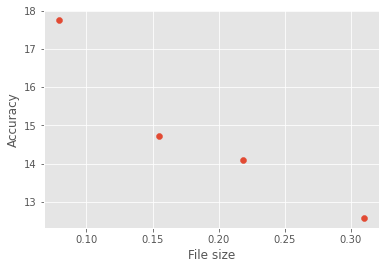

In [38]:

stats1 = [i for i in stats if '/0/video' in i['video_name']]
stats1 = [i for i in stats1 if 'fr_3_res_720' in i['video_name']]
# stats1 = [i for i in stats if '/10/video' in i['video_name']]
# stats1 = [i for i in stats1 if 'fr_30_res_720' in i['video_name']]
print([i['video_name'] for i in stats1])

def plot(data):
    plt.scatter([i['norm_bw'] for i in data], [i['sum_score'] - 2.5/5*40*i['norm_bw'] - 5 * i['std_score_mean'] for i in data])
    plt.xlabel('File size')
    plt.ylabel('Accuracy')
plot(stats1)

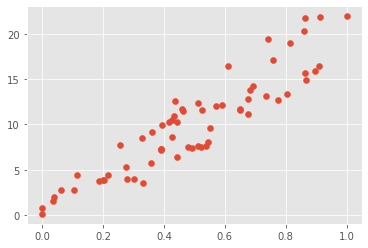

In [116]:

stats1 = [i for i in stats if '/0/video' in i['video_name']]

def plot_meanscore(data):
    plt.scatter([i['bw'] for i in data], [i['f1'] for i in data], c=[i['sum_score'] for i in data], cmap='gray')
    plt.xlabel('File size')
    plt.ylabel('Sum of score')

def plot2(data, key):
    plt.scatter([i['f1'] for i in data], [i[key] for i in data])

res = [i for i in stats1 if '_qp_' in i['video_name']]
# plot2(res, 'top10_score')
plot2(res, 'sum_score')
# plot_meanscore(res)



In [5]:
def parse(x):

    name = x['video_name']
    name = name.split('_')

    for i, key in enumerate(name):
        if key in ['qp', 'res', 'fr']:
            x[key] = int(name[i+1])
    return x

stats = [parse(x) for x in stats]

In [11]:
def calc_pareto_boundary(x):

    for i in x:
        for j in x:
            if i == j:
                continue
            if i['f1'] > j['f1'] and i['bw'] < j['bw']:
                j['discard'] = True

    x = [i for i in x if 'discard' not in i]
    x = sorted(x, key = lambda x: x['bw'])

    return [i for i in x], [f"qp_{i['qp']}_fr_{i['fr']}_res_{i['res']}" for i in x if 'qp' in i]

profile = calc_pareto_boundary([i for i in stats if '/1/video' in i['video_name']])

In [19]:
def get_cost(key):

    conf = [[i for i in stats if f'/{sec}/' in i['video_name'] and key in i['video_name']][0] for sec in range(total_sec)]

    return np.mean([i['norm_bw'] for i in conf]), np.mean([i['f1'] for i in conf])


awstream = [get_cost(key) for key in profile[1]]

In [21]:
with open('stuttgart_0_diff.txt', 'r') as f:
    diff_stats = yaml.safe_load(f.read())
diff_perf = [(np.mean([i['true_average_bw'] for i in diff_stats]), np.mean([i['true_average_f1'] for i in diff_stats]))]


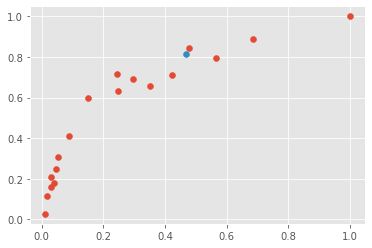

In [22]:
plt.clf()
plt.scatter([i[0] for i in awstream], [i[1] for i in awstream])
plt.scatter([i[0] for i in diff_perf], [i[1] for i in diff_perf])
# plt.scatter([i[0] for i in diff_perf2], [i[1] for i in diff_perf2])

## Generate mpeg config

In [43]:
config = [i['config'] for i in stats if '/0/' in i['video_name']]


mean_keys = ['bw', 'f1', 'trunc_sum_score', 'sum_score', 'mean_score', 'trunc_mean_score', 'qp', 'res', 'fr', 'norm_bw', 'delta_score', 'std_score_mean', 'range_score_mean', 'abs_score_mean', 'tp', 'fp', 'fn']

def get_config_perf(config):

    stats_config = [[i for i in stats if config in i['video_name'] and f'/{sec}/' in i['video_name']][0] for sec in range(total_sec)]

    ret = {}
    for key in mean_keys:
        ret[key] = np.mean([i[key] for i in stats_config])

    return ret


mpeg = [get_config_perf(conf) for conf in config]
mpeg_conf = [(get_config_perf(conf), conf) for conf in config]

for i in mpeg_conf:
    i[0].update({'config': i[1]})
mpeg_conf = [i[0] for i in mpeg_conf]
# mpeg_conf = [{'bw': i[0][0], 'f1': i[0][1], 'config': i[1], 'trunc_sum_score': i[0][2], 'sum_score': i[0][3]} for i in mpeg_conf]
for i in mpeg_conf:
    i.update(parse_config(i['config'], from_video_name=False))


# plt.scatter([i['norm_bw'] for i in mpeg_conf], [i['f1'] for i in mpeg_conf], c=[i['sum_score'] - 2.5/5*40*i['norm_bw'] - 15 * i['std_score_mean'] for i in mpeg_conf], cmap='Blues_r')
# plt.scatter([i['norm_bw'] for i in mpeg_conf], [i['f1'] for i in mpeg_conf], c=[i['sum_score'] - 2.5/5*40*i['norm_bw'] - 15 * i['abs_score_mean'] for i in mpeg_conf], cmap='Blues_r')


144


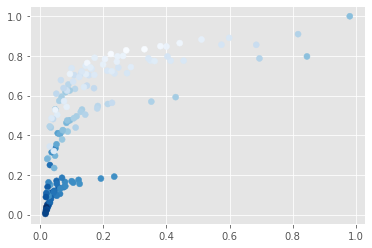

In [66]:
for i in mpeg_conf:
    tp = i['tp']
    fp = i['fp']
    fn = i['fn']
    pr,re = tp/(tp+fp), tp/(tp+fn)
    i['f1'] = 2/(1/pr + 1/re)

mpeg_conf_ = mpeg_conf
print(len(mpeg_conf))
# plt.scatter([i['norm_bw'] for i in mpeg_conf], [i['f1']  for i in mpeg_conf], cmap='Blues_r', c=[i['sum_score'] - 15 * i['std_score_mean'] for i in mpeg_conf])
plt.scatter([i['norm_bw'] for i in mpeg_conf], [i['f1']  for i in mpeg_conf], cmap='Blues_r', c=[i['mean_score'] - 0.1 * i['std_score_mean'] - 2.5/50*i['norm_bw'] for i in mpeg_conf])
# plt.scatter([i['sum_score'] - 0.1 * i['std_score_mean']  for i in mpeg_conf], [i['f1']  for i in mpeg_conf], )

mpeg_conf = mpeg_conf_

/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Objective')

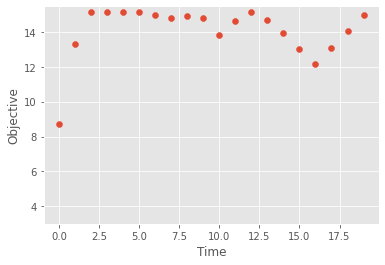

In [8]:

serialize_order = ['qp', 'fr', 'res']

def serialize_all_states(prefix, config, prob, keys):

    if len(keys) == 0:
        yield (prefix, prob)
    else:
        key = keys[0]
        yield from serialize_all_states(prefix +'_' + key + '_' + str(config[key][0][0]), config, prob * config[key][0][1], keys[1:])
        yield from serialize_all_states(prefix +'_' + key + '_' + str(config[key][1][0]), config, prob * config[key][1][1], keys[1:])


def get_average_performance(name):
    with open(name, 'r') as f:
        diff = yaml.load(f.read())

    diff_overall_average_performance = []
    for sec, diff_item in enumerate(diff):

        norm_bw, f1, sum_score, std_score_mean = 0., 0., 0., 0.
        for state in serialize_all_states('video', diff_item['config'], 1.0, serialize_order):

            config, prob = state
            flag = False
            for mpeg in mpeg_conf:
                if config == mpeg['config']:
                    norm_bw += mpeg['norm_bw'] * prob
                    f1 += mpeg['f1'] * prob
                    sum_score += mpeg['sum_score'] * prob
                    std_score_mean += mpeg['std_score_mean'] * prob
                    flag = True
            assert flag


        diff_overall_average_performance.append({
            'obj': sum_score - 15 * std_score_mean - 2.5/5*40*norm_bw,
            'f1': f1,
            'norm_bw': norm_bw})

    return diff_overall_average_performance, diff

# plt.figure(figsize=(20, 10))

# plt.scatter([i['norm_bw'] for i in mpeg_conf], [i['f1'] for i in mpeg_conf], c=[i['sum_score'] - 2.5/5*40*i['norm_bw'] - 15 * i['std_score_mean'] for i in mpeg_conf], cmap='Blues_r')


# plt.scatter([np.mean([i['true_average_bw'] for i in diff])], [np.mean([i['true_average_f1'] for i in diff])])

# plt.scatter([i[0] for i in diff_overall_average_performance], [i[1] for i in diff_overall_average_performance])
# for i in range(len(diff_overall_average_performance)):
#     plt.text(diff_overall_average_performance[i][0], diff_overall_average_performance[i][1], '%d' % i)

# plt.xlabel('Normalized bandwidth')
# plt.ylabel('Accuracy (F1)')
diff_overall_average_performance, diff = get_average_performance('diff_results/stuttgart_0_lr_0.5_qp_1_res_1e-06_fr_1.txt')
plt.scatter([i for i in range(len(diff_overall_average_performance))], [i['obj'] for i in diff_overall_average_performance])
# plt.scatter([i for i in range(len(diff))], [i['true_obj'] for i in diff])
plt.ylim(bottom=3)
plt.xlabel('Time')
plt.ylabel('Objective')

/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'F1 score')

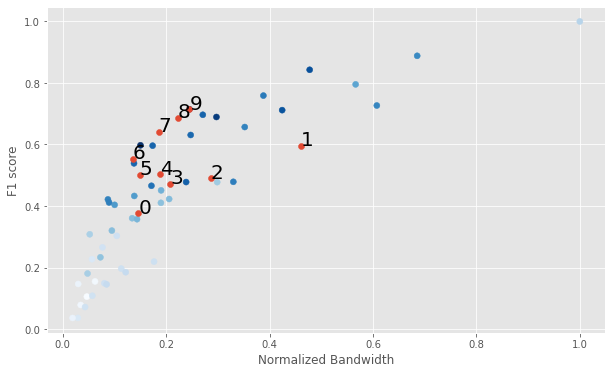

In [58]:
# diff_overall_average_performance, diff = get_average_performance('diff_results/stuttgart_0_lr_0.5_qp_1_res_1e-06_fr_1.txt')
diff_overall_average_performance, diff = get_average_performance('diff_results/stuttgart_0_lr_0.5_qp_0.49_res_1e-06_fr_0.49.txt')


plt.figure(figsize=(10, 6))
plt.scatter([i['norm_bw'] for i in mpeg_conf], [i['f1'] for i in mpeg_conf], c=[i['sum_score'] - 2.5/5*40*i['norm_bw'] - 15 * i['std_score_mean'] for i in mpeg_conf], cmap='Blues')
diff_overall_average_performance = diff_overall_average_performance[:10]
plt.scatter([i['norm_bw'] for i in diff_overall_average_performance], [i['f1'] for i in diff_overall_average_performance])
for i in range(len(diff_overall_average_performance)):
    plt.text(diff_overall_average_performance[i]['norm_bw'], diff_overall_average_performance[i]['f1'], '%d' % i, fontsize=20)
plt.xlabel('Normalized Bandwidth')
plt.ylabel('F1 score')

In [56]:
qp_list = [1e-6, 0.49, 1]
fr_list = [1e-6, 0.49, 1]
res_list = [1e-6, 0.49, 1]
# res_list = [1e-6,  0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
# res_list = [res_list[i] for i in range(len(res_list)) if i % 2 == 1]

from itertools import product

lr = 0.5
orig_freq = 1

force = True

times = []
outputs = []

for qp, fr, res in product(qp_list, fr_list, res_list):

    freq = orig_freq

    # output = f'diff_results_dense_interp/stuttgart_0_lr_{lr}_qp_{qp}_res_{res}_fr_{fr}.txt'
    output = f'diff_results/stuttgart_0_lr_{lr}_qp_{qp}_res_{res}_fr_{fr}.txt'

    diff_overall_average_performance, _ = get_average_performance(output)
    diff_overall_average_performance.append(100)
    outputs.append(output)
    for i, val in enumerate(diff_overall_average_performance):
        if val['obj'] > 14.5:
            times.append(i)
            break
        if i == 20:
            print(output)

import numpy as np
print(times)
print(np.mean(times))
print(outputs[12])

/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app
[2, 4, 0, 5, 5, 2, 8, 3, 6, 3, 0, 3, 7, 0, 5, 4, 0, 2, 1, 1, 2, 1, 1, 8, 2, 1, 18]
3.4814814814814814
diff_results/stuttgart_0_lr_0.5_qp_0.49_res_1e-06_fr_0.49.txt


In [14]:
qp_list = [1e-6, 0.49, 1]
fr_list = [1e-6, 0.49, 1]
res_list = [1e-6, 0.49, 1]
# res_list = [1e-6,  0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
# res_list = [res_list[i] for i in range(len(res_list)) if i % 2 == 1]

from itertools import product

lr = 0.05
orig_freq = 1

force = True

times = []

for qp, fr, res in product(qp_list, fr_list, res_list):

    freq = orig_freq

    # output = f'diff_results_dense_interp/stuttgart_0_lr_{lr}_qp_{qp}_res_{res}_fr_{fr}.txt'
    output = f'diff_results/stuttgart_0_sgd_lr_{lr}_qp_{qp}_res_{res}_fr_{fr}.txt'

    diff_overall_average_performance, _ = get_average_performance(output)
    diff_overall_average_performance.append(100)
    for i, val in enumerate(diff_overall_average_performance):
        if val > 14.5:
            times.append(i)
            break
        if i == 20:
            print(output)

import numpy as np
print(times)
print(np.mean(times))

/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app
[18, 7, 0, 5, 18, 4, 8, 9, 19, 8, 8, 8, 20, 18, 7, 20, 8, 5, 19, 4, 8, 3, 11, 3, 17, 6, 8]
9.962962962962964


/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


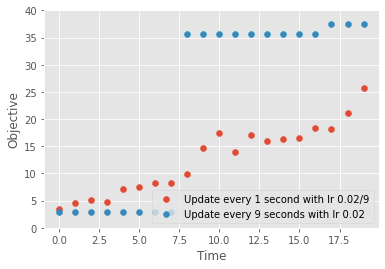

In [42]:

def plot(filename, label):
    with open(filename, 'r') as f:
        diff = yaml.load(f.read())

    diff_overall_average_performance = []
    for sec, diff_item in enumerate(diff):

        norm_bw, f1, sum_score, delta_score = 0., 0., 0., 0.
        for state in serialize_all_states('video_', diff_item['config'], 1.0, serialize_order):

            config, prob = state
            for mpeg in mpeg_conf:
                if config == mpeg['config']:
                    norm_bw += mpeg['norm_bw'] * prob
                    f1 += mpeg['f1'] * prob
                    sum_score += mpeg['sum_score'] * prob
                    delta_score += mpeg['delta_score'] * prob

        diff_overall_average_performance.append((norm_bw, f1, sum_score, delta_score))
    plt.scatter([i for i in range(len(diff_overall_average_performance))], [i[2] + 25 * i[3] - 2.5 / 5 * 40 * i[1] for i in diff_overall_average_performance], label=label)
plt.ylim((0, 40))

plot('diff_results_comp_freq9/stuttgart_0_diff_freq_1_lr_0.02_qp_1e-07_res_1e-07_fr_1e-07.txt', 'Update every 1 second with lr 0.02/9')
plot('diff_results_comp_freq9/stuttgart_0_diff_freq_9_lr_0.02_qp_1e-07_res_1e-07_fr_1e-07.txt', 'Update every 9 seconds with lr 0.02')
plt.xlabel('Time')
plt.ylabel('Objective')
plt.legend()



# linear regression significance test

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     76.27
Date:                Mon, 31 May 2021   Prob (F-statistic):           2.13e-12
Time:                        20:35:47   Log-Likelihood:                 26.083
No. Observations:                  64   AIC:                            -48.17
Df Residuals:                      62   BIC:                            -43.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0096      0.045      0.215      0.8

Text(0, 0.5, 'Accuracy (F1)')

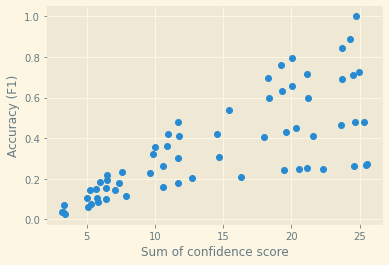

In [36]:
# import pandas as pd
# import numpy as np
# from sklearn import datasets, linear_model
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# from scipy import stats


# diabetes = datasets.load_diabetes()
X = np.array([[i['sum_score']] for i in mpeg_conf])
y = np.array([i['f1'] for i in mpeg_conf])


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

plt.scatter(X, y)
plt.xlabel('Sum of confidence score')
plt.ylabel('Accuracy (F1)')

[123089.70337245  -6634.7401455     228.31799769   3258.6768985 ]


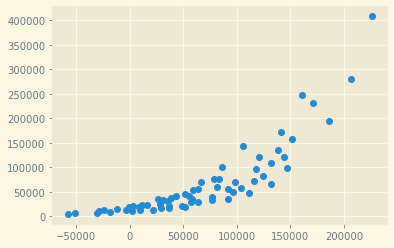

In [64]:
def get_feature(x):
    return [
        # 2 ** (-(x['qp'] - 24)/6),
        x['qp'],
        # (x['res'] / 100) ** 2,
        x['res'],
        x['fr']
    ]

X = np.array([get_feature(i) for i in mpeg_conf])
y = np.array([i['bw'] for i in mpeg_conf])


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
# print(est2.summary())

plt.scatter(est2.predict(X2), y)
print(est2.params)

# Find the objective function

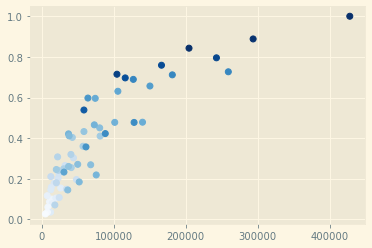

In [62]:
plt.scatter([i['bw'] for i in mpeg_conf], [i['f1'] for i in mpeg_conf], c=[i['sum_score'] + 25 * i['delta_score'] for i in mpeg_conf], cmap='Blues')

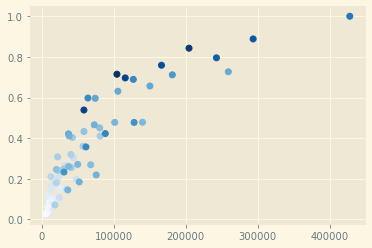

In [63]:
plt.scatter([i['bw'] for i in mpeg_conf], [i['f1'] for i in mpeg_conf], c=[i['sum_score'] + 25 * i['delta_score'] - 2.5/50000*400000*i['norm_bw'] for i in mpeg_conf], cmap='Blues')

Text(0, 0.5, 'Accuracy (F1)')

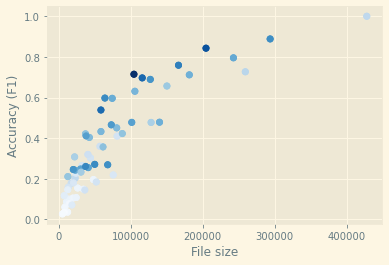

In [28]:

plt.scatter( [i['bw'] for i in mpeg_conf],[i['f1'] for i in mpeg_conf], c= [i['sum_score'] for i in mpeg_conf], cmap='Blues')
plt.xlabel('File size')
plt.ylabel('Accuracy (F1)')

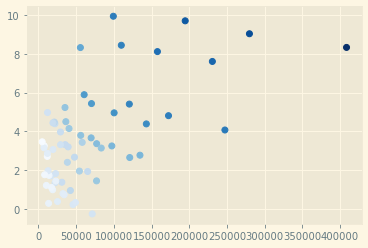

In [65]:


plt.scatter( [i['bw'] for i in mpeg_conf], [-2.5/50000 * get_bw(i) + i['trunc_sum_score'] for i in mpeg_conf], c=[i['f1'] for i in mpeg_conf], cmap='Blues')


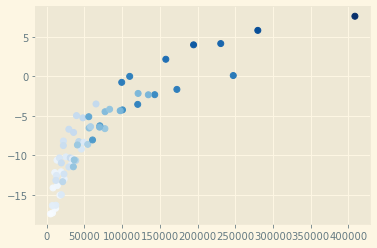

In [46]:
plt.scatter( [i['bw'] for i in mpeg_conf], [i['trunc_sum_score'] - 0.5 * (i['qp'] - 36) for i in mpeg_conf], c=[i['f1'] for i in mpeg_conf], cmap='Blues')

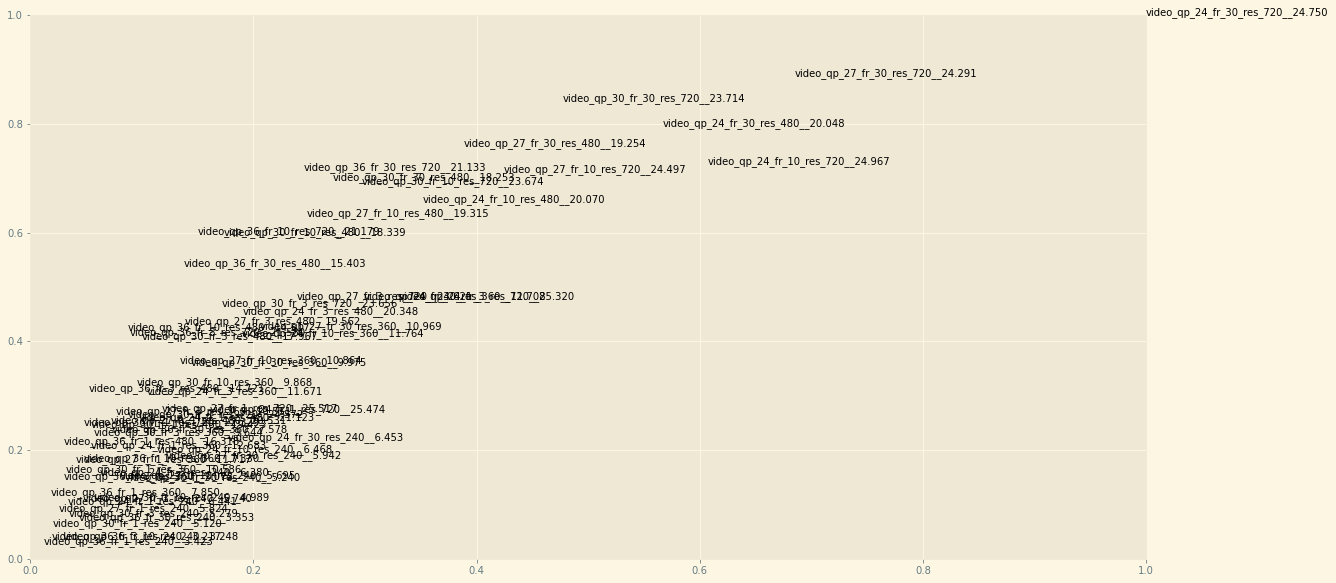

In [42]:
plt.figure(figsize=(20, 10))
# plt.scatter([i['norm_bw'] for i in mpeg_conf], [i['f1'] for i in mpeg_conf], c=[i['sum_score'] for i in mpeg_conf], cmap='Blues')
for i in mpeg_conf:
    plt.text(i['norm_bw'], i['f1'], i['config'] + '_%.3f' % i['sum_score'])

<Figure size 432x288 with 0 Axes>

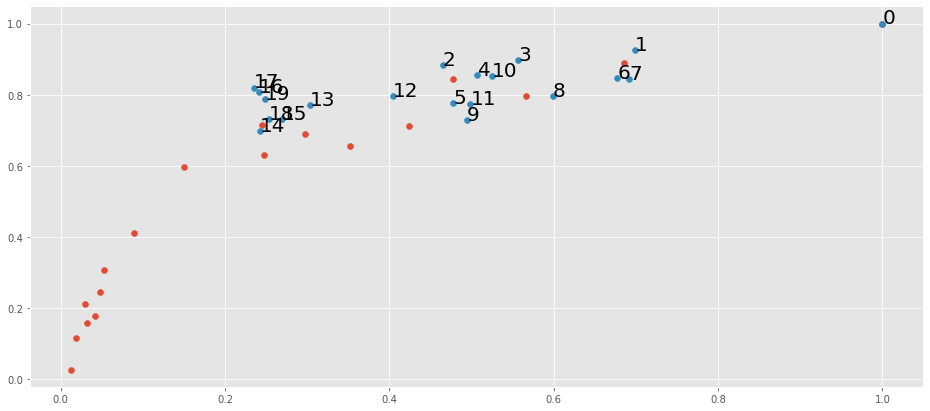

In [28]:
import matplotlib as mpl
mpl.rcParams['font.size']=10


# diff_perf = [get_diff_at_time(i) for i in range(total_sec)]
diff_perf = [(i['true_average_bw'], i['true_average_f1']) for i in diff_stats]


plt.clf()


plt.figure(figsize=(16, 7))

# plt.scatter([i[0] for i in mpeg], [i[1] for i in mpeg])
plt.scatter([i[0] for i in awstream], [i[1] for i in awstream])
plt.scatter([i[0] for i in diff_perf], [i[1] for i in diff_perf])

for i in range(total_sec):
    delta = 0
    # delta = 10000 if i in [4, 5, 8]
    plt.text(diff_perf[i][0] + delta, diff_perf[i][1], f'{i}', fontsize=20)

x, y = [i[0] for i in diff_perf], [i[1] for i in diff_perf]
u = np.diff(x)
v = np.diff(y)
pos_x = x[:-1] + u/2
pos_y = y[:-1] + v/2
norm = np.sqrt(u**2+v**2) 
# plt.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", scale=50)

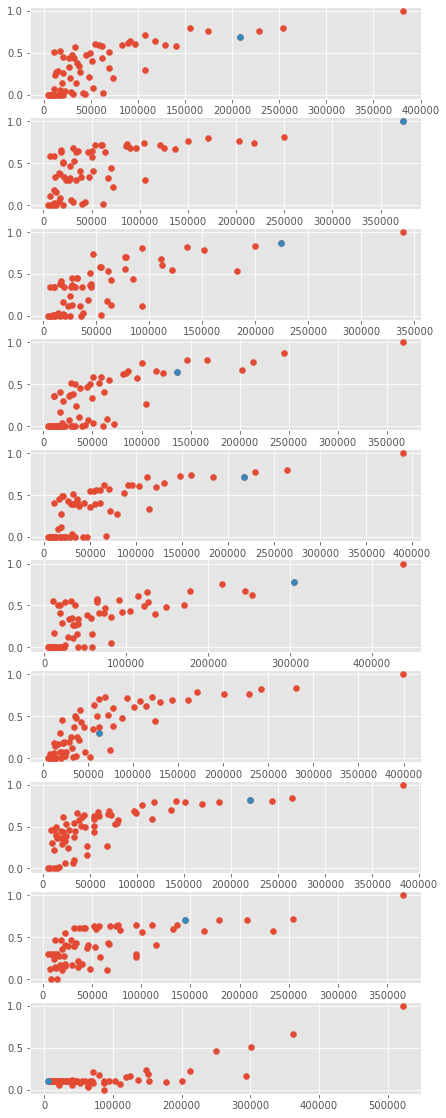

In [47]:
def plot_on_ax(ax, sec, key):

    stats_at_sec = [i for i in stats if f'/{sec}/' in i['video_name']]

    # print(stats_at_sec)

    ax.scatter([i['bw'] for i in stats_at_sec], [i['f1'] for i in stats_at_sec])

    stats_at_sec = [i for i in stats if key in i['video_name']]

    ax.scatter([i['bw'] for i in stats_at_sec], [i['f1'] for i in stats_at_sec])

fig, ax = plt.subplots((10), figsize=(7, 20))

for i in range(10):
    plot_on_ax(ax[i], i, diff_keys[i])

In [46]:
last_boundary = calc_pareto_boundary([i for i in stats if '/0/video' in i['video_name']])

iou = []

for sec in range(1, 20):

    boundary = calc_pareto_boundary([i for i in stats if f'/{sec}/video' in i['video_name']])

    iou.append(len(boundary[1] & last_boundary[1]) / len(boundary[1]))

    last_boundary = boundary

print(iou)

[0.7142857142857143, 0.6666666666666666, 0.5555555555555556, 0.7, 0.8666666666666667, 0.6666666666666666, 0.6666666666666666, 0.4117647058823529, 0.3, 0.4838709677419355, 0.75, 0.8333333333333334, 0.5882352941176471, 0.6666666666666666, 0.6111111111111112, 0.7777777777777778, 0.5833333333333334, 0.6842105263157895, 0.6818181818181818]


0.6425594649792666


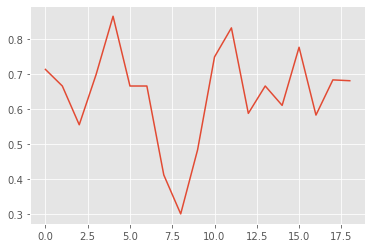

In [48]:
plt.plot(iou)
print(np.mean(iou))

In [44]:
boundaries = [calc_pareto_boundary([i for i in stats if f'/{sec}/video' in i['video_name']])[1] for sec in range(20)]

overall_intersect = boundaries[0]
for boundary in boundaries:
    overall_intersect = overall_intersect & boundary

In [45]:
overall_intersect

{'24_30_720', '36_1_240'}

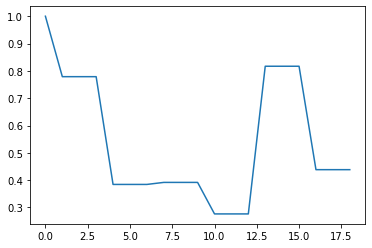

In [4]:
import torch
def transform(x):
    return [i.mean().item() for i in torch.tensor(x).split(15)]

# plt.plot(transform(aws['compute']))
plt.plot(transform(diff['compute']))

In [1]:
import av
import torch
import torchvision.transforms as T

In [3]:
container = av.open('large_1.mp4')
x = []
for frame in container.decode(video=0):
    x = x + [frame.to_image()]

    if len(x) == 30:
        break

x = [T.ToTensor()(i)[None, :, :, :] for i in x]
x = torch.cat(x)

print(x.shape)

torch.Size([30, 3, 720, 1280])


In [4]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

model = fasterrcnn_resnet50_fpn(pretrained=True)

In [5]:
from control_knobs import framerate_control, resolution_control

In [6]:
control1 = framerate_control([1,2,3,5,6,10,15,30], 2)
control2 = resolution_control([(240, 352), (480, 640), (720, 1280)], (480, 640))

In [17]:
model.cuda()
features = torch.cat([model.backbone(frame[None, :, :, :].cuda())['pool'].detach().cpu() for frame in x])


In [19]:
lq = control1(control2(x))

In [23]:
for idx, frame in enumerate(lq):

    feature = model.backbone(frame[None, :, :, :].cuda())['pool']
    print(feature.shape)
    
    (feature[0] - features[idx].cuda()).norm(p=1).backward(retain_graph=True)

torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])


In [26]:
print([i.grad for i in control1.weights])
print([i.grad for i in control2.weights])

[tensor(30891.5156), tensor(27882.7500), tensor(35151.0703), tensor(26169.0996), tensor(23069.5957), tensor(7087.2266), tensor(-16066.9072), tensor(-11475.4805)]
[tensor(81181.6328), tensor(27882.7461), tensor(-140368.4844)]


In [27]:
[i.grad.zero_() for i in control1.weights]
[i.grad.zero_() for i in control2.weights]

[tensor(0.), tensor(0.), tensor(0.)]

In [28]:
for idx, frame in enumerate(lq):

    feature = model.backbone(frame[None, :, :, :].cuda())['pool']
    print(feature.shape)
    
    (feature[0]).norm(p=1).backward(retain_graph=True)

torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])
torch.Size([1, 256, 12, 20])


In [29]:
print([i.grad for i in control1.weights])
print([i.grad for i in control2.weights])

[tensor(120677.5234), tensor(152889.9531), tensor(121015.2656), tensor(105997.5312), tensor(111793.0781), tensor(87601.6719), tensor(71129.6406), tensor(34290.3750)]
[tensor(103160.7969), tensor(152889.9688), tensor(210900.9219)]
